In [506]:
# importing needed libraries to work with the given dataset analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [507]:
# loading the loan data from given csv file into dataframe
loanCSVData = pd.read_csv("loan.csv")

# checking first few rows to visually veriry that correct file is loaded indeed
loanCSVData.head()

C:\Users\rajranja\AppData\Local\Temp\ipykernel_4624\3921208352.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loanCSVData = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [508]:
# Drop columns having all values null
def removeColumnWithAllNullValue(dataframe):
    # List the column names which have all the values as null only
    nullValueColumnNames = dataframe.columns[(~dataframe.isnull()).sum() == 0]
    if len(nullValueColumnNames) == 0:
        print("No column found with all null value")
        return dataframe
    
    print(f"List of columns having all null values: \n {nullValueColumnNames}")
    # validate that these columns indeed have only null values.
    # Find count of columns among these columns which has any not null value. Assert that count of such column is zero
    assert ((~dataframe[nullValueColumnNames].isnull()).sum() > 0).sum() == 0, "Count of columns having all null values should be null."

    return dataframe.drop(nullValueColumnNames, axis=1)

In [509]:
# Drop empty rows
def removeRowsWithAllNullValue(dataframe):
    IsEmptyRowIndices = (~dataframe.isnull()).sum(axis=1) == 0
    emptyRowCount = IsEmptyRowIndices.sum()
    if (emptyRowCount == 0):
        print(f"No empty row found")
        return dataframe
    
    print(f"found {emptyRowCount} empty row(s)")  
    clearnedData = dataframe.drop(loanCSVData[IsEmptyRowIndices.index])
    assert ((~dataframe.isnull()).sum(axis=1) == 0).sum() == 0, "Count of rows with all values null should be zero"
    return clearnedData

In [510]:
# drop columns having single values
def dropMonotonousColumns(dataframe):
    singleValueColumns = dataframe.columns[dataframe.nunique() == 1]
    if (len(singleValueColumns) == 0):
        print("No column found having same value in all rows")
        return dataframe

    print(f"Columns with single value in all rows :{singleValueColumns}")
    return dataframe.drop(singleValueColumns, axis=1)

In [511]:
# Drop columns having all values null
cleanedLoanData = removeRowsWithAllNullValue(removeColumnWithAllNullValue(loanCSVData))

List of columns having all null values: 
 Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', '

Above data looks good. We have a new data frame which does not have all null value column.
Now lets check if there is any all null value row

There are no rows which has all values as null.

There three values in loan_status column.<br>
While  Fully Paid and Charged Off are terminal state and can be used in data analysis, Current is not useful since it can not help to know wheter the loan will land into Fully Paid or Charged Off in coming days.<br>
Hence we should drop all the rows having value of loan_status as Current.

In [512]:
# drop rows having value of loan_status as Current
rowsWithLoanStatusAsCurrent = cleanedLoanData[cleanedLoanData.loan_status == "Current"]
print(f"dropping {rowsWithLoanStatusAsCurrent.shape[0]} rows having loan status = Current");

cleanedLoanData = cleanedLoanData.drop(rowsWithLoanStatusAsCurrent.index)
assert (cleanedLoanData.loan_status == "Current").sum() == 0, "Loan status should not have value Current"

# since we removed some rows, lets check and remove all null column and rows
cleanedLoanData = removeRowsWithAllNullValue(removeColumnWithAllNullValue(cleanedLoanData))

dropping 1140 rows having loan status = Current
List of columns having all null values: 
 Index(['next_pymnt_d'], dtype='object')
No empty row found


In [513]:
# Find all columns with data type as object
cleanedLoanData.dtypes[cleanedLoanData.dtypes == "object"]

term                   object
int_rate               object
grade                  object
sub_grade              object
emp_title              object
emp_length             object
home_ownership         object
verification_status    object
issue_d                object
loan_status            object
pymnt_plan             object
url                    object
desc                   object
purpose                object
title                  object
zip_code               object
addr_state             object
earliest_cr_line       object
revol_util             object
initial_list_status    object
last_pymnt_d           object
last_credit_pull_d     object
application_type       object
dtype: object

- int_rate can be cleaned to remove "%" character and then convert it into float<br>
- issue_d sould be converted into date<br>
- pymnt_plan has same value in all rows.<br>
- url column is not useful can be dropped<br>
- earliest_cr_line should be date <br>
- remote % from revol_util and convert into float. There are 3 rows with blank value. We can remove this.<br>
- initial_list_status, out_prncp, out_prncp_inv have same value in all rows, need to remove <br>
- last_pymnt_d: convert into date <br>
- next_pymnt_d is all empty need to remove<br>
- last_credit_pull_d: date type <br>
- application_type, all the same value <br>

In [514]:
# drop monotonous values columns
cleanedLoanData = dropMonotonousColumns(cleanedLoanData)

# Since we removed some columns lets check for empty rows again.
cleanedLoanData = removeRowsWithAllNullValue(cleanedLoanData)

Columns with single value in all rows :Index(['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')
No empty row found


In [515]:
# removing % from int_rate and converting it into float type
cleanedLoanData['int_rate'] = cleanedLoanData['int_rate'].apply(lambda x:x.replace("%", "")).astype('float')
cleanedLoanData['int_rate'].describe()



count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [516]:
# convert issue_d into datetime
cleanedLoanData['issue_d'] = pd.to_datetime("01-" + cleanedLoanData['issue_d'])
cleanedLoanData['issue_d'].describe()

C:\Users\rajranja\AppData\Local\Temp\ipykernel_4624\2784875672.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleanedLoanData['issue_d'] = pd.to_datetime("01-" + cleanedLoanData['issue_d'])


count                            38577
mean     2010-10-25 23:47:14.030640128
min                2007-06-01 00:00:00
25%                2010-05-01 00:00:00
50%                2011-01-01 00:00:00
75%                2011-08-01 00:00:00
max                2011-12-01 00:00:00
Name: issue_d, dtype: object

In [517]:
# drop url column since it does not seems to have any useful info
cleanedLoanData = cleanedLoanData.drop(['url'], axis=1)

In [518]:
cleanedLoanData['earliest_cr_line'] = pd.to_datetime("01-" + cleanedLoanData['earliest_cr_line'])
cleanedLoanData['earliest_cr_line'].describe()

C:\Users\rajranja\AppData\Local\Temp\ipykernel_4624\3748999512.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleanedLoanData['earliest_cr_line'] = pd.to_datetime("01-" + cleanedLoanData['earliest_cr_line'])


count                         38577
mean     1997-12-07 18:49:01.255152
min             1974-01-01 00:00:00
25%             1994-01-01 00:00:00
50%             1998-07-01 00:00:00
75%             2001-10-01 00:00:00
max             2073-12-01 00:00:00
Name: earliest_cr_line, dtype: object

In [519]:
cleanedLoanData['last_pymnt_d'] = pd.to_datetime("01-" + cleanedLoanData['last_pymnt_d'])
cleanedLoanData['last_pymnt_d'].describe()

C:\Users\rajranja\AppData\Local\Temp\ipykernel_4624\723527673.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleanedLoanData['last_pymnt_d'] = pd.to_datetime("01-" + cleanedLoanData['last_pymnt_d'])


count                            38506
mean     2013-03-08 04:54:38.948735232
min                2008-01-01 00:00:00
25%                2012-03-01 00:00:00
50%                2013-04-01 00:00:00
75%                2014-04-01 00:00:00
max                2016-05-01 00:00:00
Name: last_pymnt_d, dtype: object

In [520]:
cleanedLoanData['last_credit_pull_d'] = pd.to_datetime("01-" + cleanedLoanData['last_credit_pull_d'])
cleanedLoanData['last_credit_pull_d'].describe()

C:\Users\rajranja\AppData\Local\Temp\ipykernel_4624\718289758.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleanedLoanData['last_credit_pull_d'] = pd.to_datetime("01-" + cleanedLoanData['last_credit_pull_d'])


count                            38575
mean     2014-08-21 06:31:55.582631168
min                2007-05-01 00:00:00
25%                2013-05-01 00:00:00
50%                2015-02-01 00:00:00
75%                2016-04-01 00:00:00
max                2016-05-01 00:00:00
Name: last_credit_pull_d, dtype: object

In [521]:
#cleanedLoanData.dtypes[cleanedLoanData.dtypes == "object"]
cleanedLoanData['revol_util'] = cleanedLoanData['revol_util'].apply(lambda x: float(str(x).replace("%", "")))
cleanedLoanData['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [522]:
# We should have all the object types for string data only
cleanedLoanData.dtypes[cleanedLoanData.dtypes == "object"]

term                   object
grade                  object
sub_grade              object
emp_title              object
emp_length             object
home_ownership         object
verification_status    object
loan_status            object
desc                   object
purpose                object
title                  object
zip_code               object
addr_state             object
dtype: object

In [523]:
cleanedLoanData["grade-sub-grade-cum"] = cleanedLoanData["grade"] + cleanedLoanData["sub_grade"]
cleanedLoanData["grade-sub-grade-vs-cum"] = cleanedLoanData["grade-sub-grade-cum"] + cleanedLoanData["verification_status"]
cleanedLoanData['dti_bin'] = pd.cut(cleanedLoanData["dti"], bins=30, labels=False)
cleanedLoanData['revol_util_bin'] = pd.cut(cleanedLoanData["revol_util"], bins=30, labels=False)
cleanedLoanData['revol_bal_bin'] = pd.cut(cleanedLoanData["revol_bal"], bins=100, labels=False)
cleanedLoanData['annual_inc_bin'] = pd.cut(cleanedLoanData["annual_inc"], bins=100, labels=False)

cleanedLoanData["emp_length_converted"] = cleanedLoanData["emp_length"].apply(lambda x: x.replace(" years","").replace(" year","").replace("+","").replace("< 1","0") if isinstance(x, str) else x)

FullyPaid =  cleanedLoanData[cleanedLoanData.loan_status == "Fully Paid"]
ChargedOff =  cleanedLoanData[cleanedLoanData.loan_status == "Charged Off"]

# temp["loan_status_count"] = temp.groupby(["loan_status", "grade"])["loan_status"].transform("count")
#print(temp.head())
# temp["loan_status_count"] = cleanedLoanData.groupby("loan_status")["grade"].transform("count")
# temp[["loan_status","grade", "loan_status_count"]].groupby("loan_status").value_counts()
# temp.groupby("loan_status")["loan_status"].transform("sum")

<DatetimeArray>
['1985-01-01 00:00:00', '1999-04-01 00:00:00', '2001-11-01 00:00:00',
 '1996-02-01 00:00:00', '2004-11-01 00:00:00', '2005-07-01 00:00:00',
 '2007-01-01 00:00:00', '2004-04-01 00:00:00', '2004-09-01 00:00:00',
 '1998-01-01 00:00:00',
 ...
 '2067-05-01 00:00:00', '2061-11-01 00:00:00', '2067-02-01 00:00:00',
 '2068-11-01 00:00:00', '1975-10-01 00:00:00', '2071-03-01 00:00:00',
 '2071-08-01 00:00:00', '2066-12-01 00:00:00', '2068-10-01 00:00:00',
 '1974-10-01 00:00:00']
Length: 524, dtype: datetime64[ns]

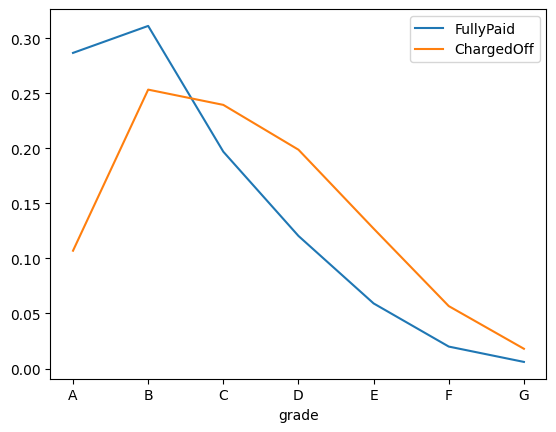

In [413]:
fig, ax = plt.subplots()

FullyPaid["grade"].value_counts(normalize=True).sort_index().plot(ax=ax,legend=True)
ChargedOff["grade"].value_counts(normalize=True).sort_index().plot(ax=ax, legend=True)
ax.legend(["FullyPaid", "ChargedOff"])


<Axes: xlabel='sub_grade'>

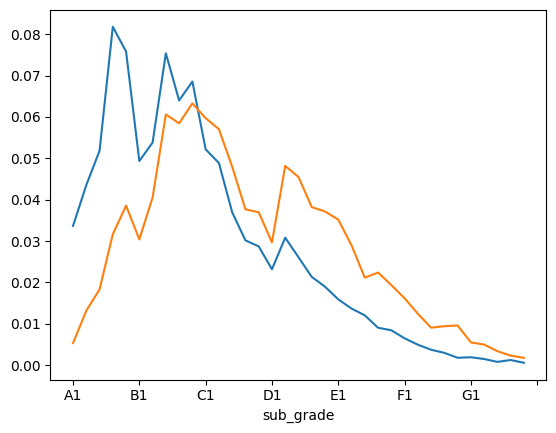

In [414]:
FullyPaid["sub_grade"].value_counts(normalize=True).sort_index().plot()
ChargedOff["sub_grade"].value_counts(normalize=True).sort_index().plot()


<Axes: xlabel='grade-sub-grade-cum'>

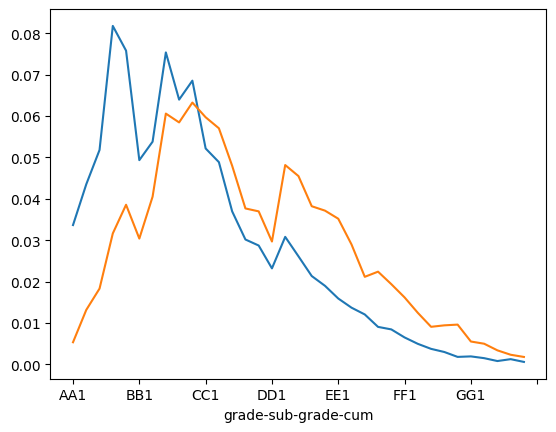

In [415]:
FullyPaid["grade-sub-grade-cum"].value_counts(normalize=True).sort_index().plot()
ChargedOff["grade-sub-grade-cum"].value_counts(normalize=True).sort_index().plot()

<Axes: xlabel='verification_status'>

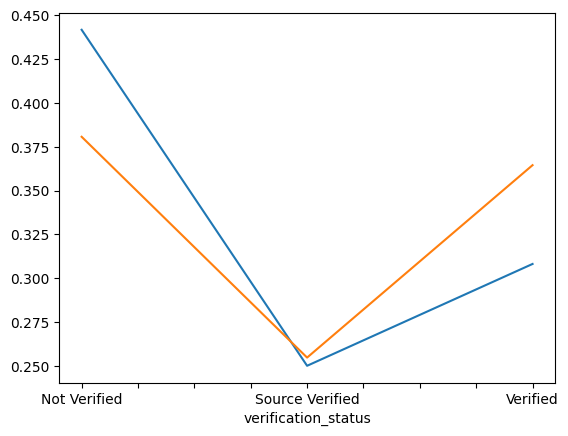

In [416]:
FullyPaid["verification_status"].value_counts(normalize=True).sort_index().plot()
ChargedOff["verification_status"].value_counts(normalize=True).sort_index().plot()

<Axes: xlabel='grade-sub-grade-vs-cum'>

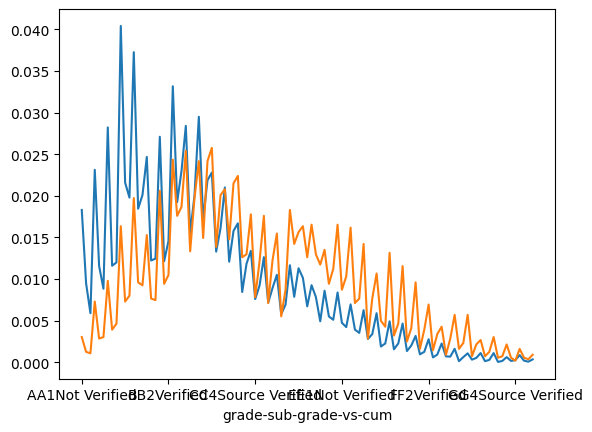

In [417]:
FullyPaid["grade-sub-grade-vs-cum"].value_counts(normalize=True).sort_index().plot()
ChargedOff["grade-sub-grade-vs-cum"].value_counts(normalize=True).sort_index().plot()

<Axes: xlabel='home_ownership'>

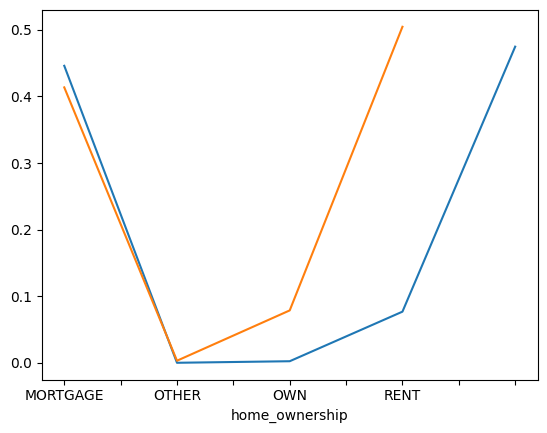

In [418]:
FullyPaid["home_ownership"].value_counts(normalize=True).sort_index().plot()
ChargedOff["home_ownership"].value_counts(normalize=True).sort_index().plot()

<Axes: xlabel='delinq_2yrs'>

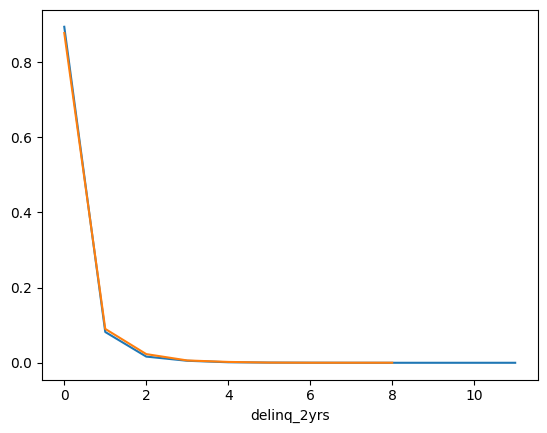

In [419]:
FullyPaid["delinq_2yrs"].value_counts(normalize=True).sort_index().plot()
ChargedOff["delinq_2yrs"].value_counts(normalize=True).sort_index().plot()

<Axes: xlabel='total_acc'>

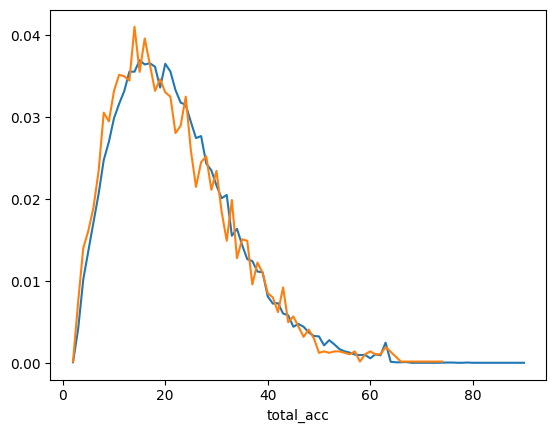

In [420]:
FullyPaid["total_acc"].value_counts(normalize=True).sort_index().plot()
ChargedOff["total_acc"].value_counts(normalize=True).sort_index().plot()

<Axes: xlabel='grade'>

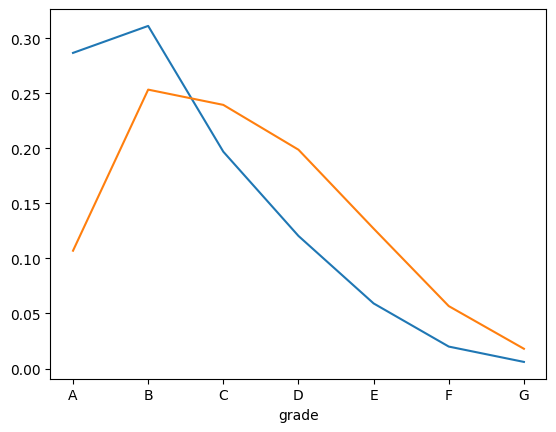

In [421]:
FullyPaid["grade"].value_counts(normalize=True).sort_index().plot()
ChargedOff["grade"].value_counts(normalize=True).sort_index().plot()

In [422]:
FullyPaid["grade"].value_counts(normalize=True).sort_index() - ChargedOff["grade"].value_counts(normalize=True).sort_index()

grade
A    0.179602
B    0.057834
C   -0.042508
D   -0.078290
E   -0.067946
F   -0.036752
G   -0.011940
Name: proportion, dtype: float64

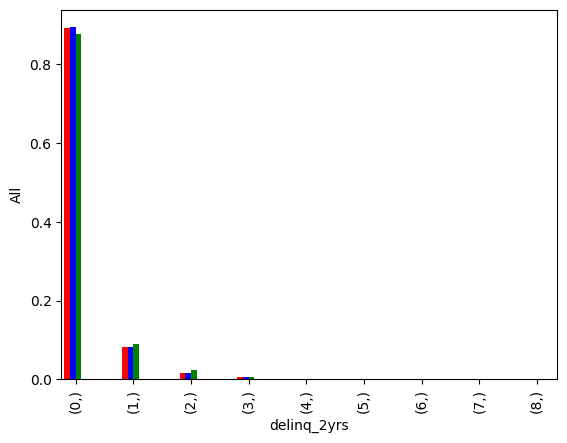

In [423]:
fig = plt.figure() # Create matplotlib figure
all = fig.add_subplot(111) # Create matplotlib axes
width = 0.1
cleanedLoanData[["delinq_2yrs"]].value_counts(normalize=True).sort_index().plot(kind="bar", color="red", ax=all, width=width, position=2)
FullyPaid[["delinq_2yrs"]].value_counts(normalize=True).sort_index().plot(kind="bar", color="blue", ax=all, width=width, position=1)
ChargedOff[["delinq_2yrs"]].value_counts(normalize=True).sort_index().plot(kind="bar", color="green", ax=all, width=width, position=0)

all.set_ylabel('All')

plt.show()

Looking at above graph it looks like most of the borrowers have no delinq in past 2 years.
We also observe that the trend is same across loan status.

<Axes: xlabel='dti_bin'>

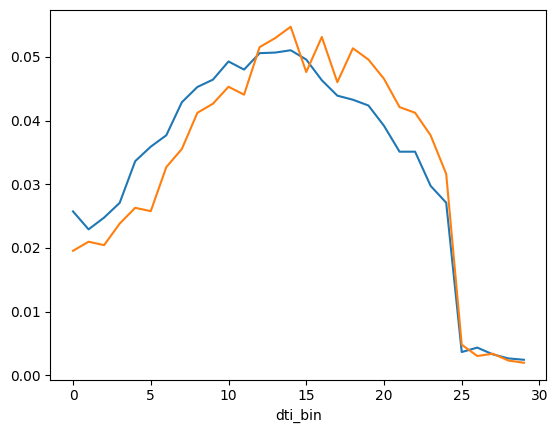

In [424]:
FullyPaid["dti_bin"].value_counts(normalize=True).sort_index().plot()
ChargedOff["dti_bin"].value_counts(normalize=True).sort_index().plot()
#ChargedOff["dti"].plot()

<Axes: xlabel='emp_length_converted'>

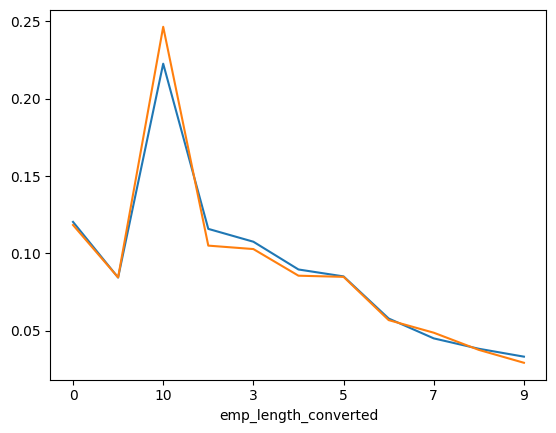

In [425]:
FullyPaid["emp_length_converted"].value_counts(normalize=True).sort_index().plot()
ChargedOff["emp_length_converted"].value_counts(normalize=True).sort_index().plot()

No distinct influence to loan status observed

<Axes: xlabel='inq_last_6mths'>

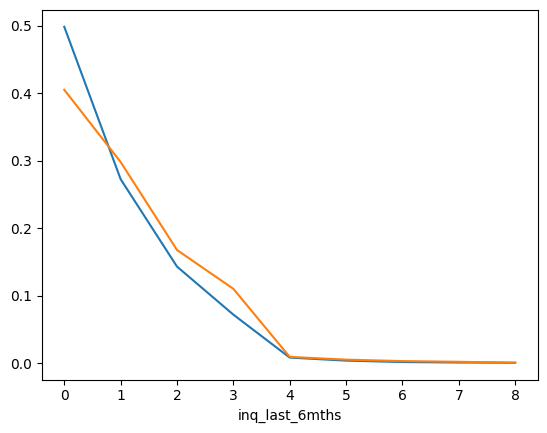

In [426]:
FullyPaid["inq_last_6mths"].value_counts(normalize=True).sort_index().plot()
ChargedOff["inq_last_6mths"].value_counts(normalize=True).sort_index().plot()


In [427]:
FullyPaid["revol_bal"].describe()
ChargedOff["revol_bal"].describe()

count      5627.000000
mean      13514.243647
std       15164.117475
min           0.000000
25%        3968.000000
50%        9211.000000
75%       17518.000000
max      148829.000000
Name: revol_bal, dtype: float64

In [428]:
ChargedOff["revol_bal"].describe()

count      5627.000000
mean      13514.243647
std       15164.117475
min           0.000000
25%        3968.000000
50%        9211.000000
75%       17518.000000
max      148829.000000
Name: revol_bal, dtype: float64

<Axes: xlabel='revol_bal_bin'>

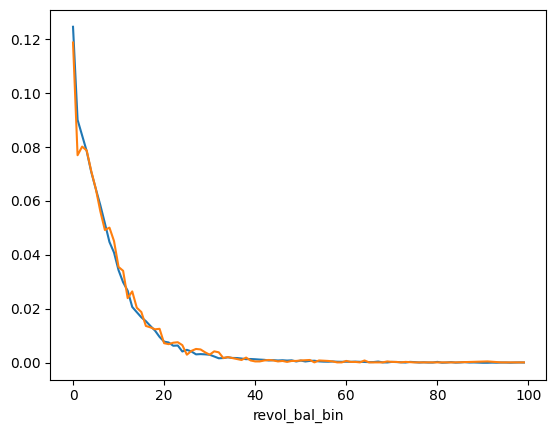

In [429]:
FullyPaid["revol_bal_bin"].value_counts(normalize=True).sort_index().plot()
ChargedOff["revol_bal_bin"].value_counts(normalize=True).sort_index().plot()

In [430]:
print(FullyPaid["revol_util"].describe())
print(ChargedOff["revol_util"].describe())

count    32916.000000
mean        47.531801
std         28.276743
min          0.000000
25%         23.900000
50%         47.600000
75%         70.800000
max         99.900000
Name: revol_util, dtype: float64
count    5611.000000
mean       55.572110
std        27.905282
min         0.000000
25%        34.400000
50%        58.400000
75%        79.000000
max        99.900000
Name: revol_util, dtype: float64


<Axes: xlabel='revol_util_bin'>

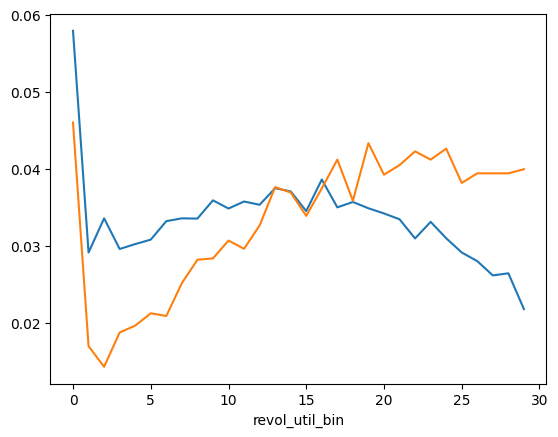

In [431]:
FullyPaid["revol_util_bin"].value_counts(normalize=True).sort_index().plot()
ChargedOff["revol_util_bin"].value_counts(normalize=True).sort_index().plot()

revol_util value higher than 20 seems to favour defaulters.

In [432]:
print(FullyPaid["annual_inc"].describe())
print(ChargedOff["annual_inc"].describe())

count    3.295000e+04
mean     6.986250e+04
std      6.656225e+04
min      4.000000e+03
25%      4.113275e+04
50%      6.000000e+04
75%      8.400000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
count    5.627000e+03
mean     6.242730e+04
std      4.777601e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64


<Axes: xlabel='annual_inc_bin'>

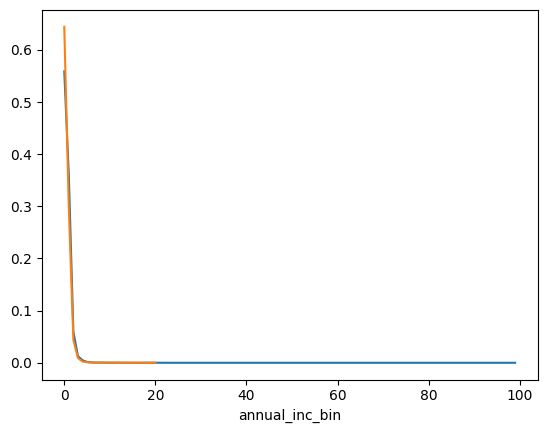

In [434]:
FullyPaid["annual_inc_bin"].value_counts(normalize=True).sort_index().plot()
ChargedOff["annual_inc_bin"].value_counts(normalize=True).sort_index().plot()

In [474]:
print(FullyPaid[["annual_inc_bin","annual_inc"]].head(100))

     annual_inc_bin  annual_inc
0                 0     24000.0
2                 0     12252.0
3                 0     49200.0
5                 0     36000.0
6                 0     47004.0
..              ...         ...
126               0     49500.0
127               1     70000.0
128               2    125000.0
129               0     33000.0
130               0     30000.0

[100 rows x 2 columns]


<Axes: xlabel='annual_inc'>

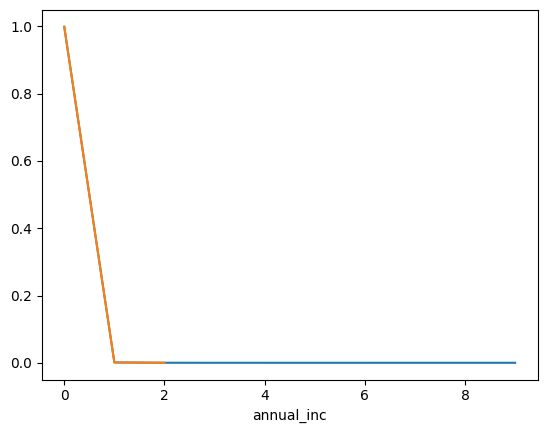

In [480]:
data1, xaxislabels = pd.cut(FullyPaid["annual_inc"], bins=10, retbins=True, labels=False)
data2 = pd.cut(ChargedOff["annual_inc"], bins=xaxislabels, labels=False)

data1.value_counts(normalize=True).sort_index().plot()
data2.value_counts(normalize=True).sort_index().plot()


<Axes: xlabel='grade'>

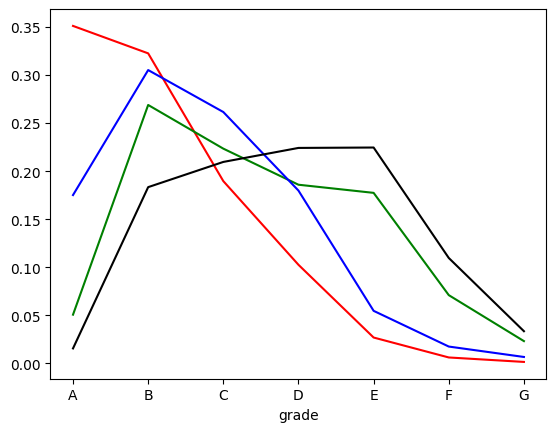

In [503]:
FullyPaid[FullyPaid.term == " 36 months"]["grade"].value_counts(normalize=True).sort_index().plot(color="red")
FullyPaid[FullyPaid.term == " 60 months"]["grade"].value_counts(normalize=True).sort_index().plot(color="green")
ChargedOff[ChargedOff.term == " 36 months"]["grade"].value_counts(normalize=True).sort_index().plot(color="blue")
ChargedOff[ChargedOff.term == " 60 months"]["grade"].value_counts(normalize=True).sort_index().plot(color="black")

<Axes: xlabel='verification_status'>

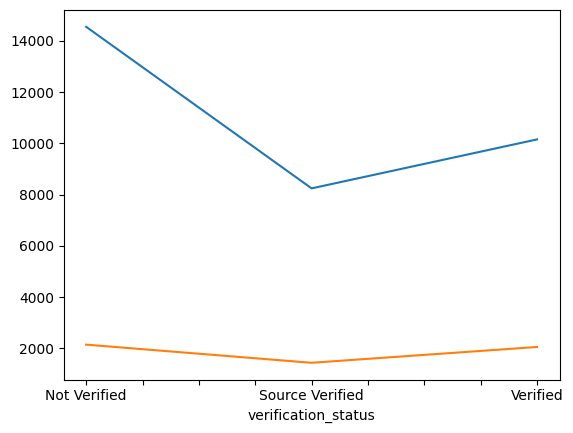

In [505]:
FullyPaid["verification_status"].value_counts(normalize=True).sort_index().plot()
ChargedOff["verification_status"].value_counts(normalize=True).sort_index().plot()